<a href="https://colab.research.google.com/github/KareemYasser20/Pneumoray/blob/main/VGG16_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""## **import library**"""

import os
import shutil
from pathlib import Path
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras import backend as K
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D, MaxPooling2D
from keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow. keras import Sequential
from keras.preprocessing import image
import tensorflow as tf
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow. keras import Sequential
from tensorflow.python.keras import regularizers
#VGG16 imports
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras ,os 
from keras.models import Sequential
from keras.layers import Conv2D
from keras. layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense 
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
"""## **create the lists of filespaths from the 3 directories: train,test and val.**"""

files_path_train= list(glob.glob(r'/content/drive/MyDrive/MixData/train/*/*'))
files_path_test= list(glob.glob(r'/content/drive/MyDrive/MixData/test/*/*'))
files_path_val= list(glob.glob(r'/content/drive/MyDrive/MixData/val/*/*'))
print(files_path_train)
print(files_path_test)
print(files_path_val)

"""## **create the lists of lables for each filepath.**"""

labels_train= list(map(lambda x: os.path.split(os.path.split(x)[0])[1], files_path_train)) 
labels_test= list(map(lambda x: os.path.split(os.path.split(x)[0])[1], files_path_test))
labels_val= list(map(lambda x: os.path.split(os.path.split(x)[0])[1], files_path_val))
print(files_path_train)
print(files_path_test)
print(files_path_val)

"""## **create the columns for the dataframes.**"""

labels_train= pd.Series(labels_train, name= 'Label' )
labels_test= pd.Series(labels_test, name= 'Label')
labels_val = pd.Series(labels_val, name= 'Label')


images_train= pd.Series(files_path_train, name= 'Filepath')
images_test = pd.Series(files_path_test, name= 'Filepath').astype(str)
images_val = pd.Series(files_path_val, name= 'Filepath').astype(str)

"""## **create the dataframes.**"""

train_df= pd.concat([images_train, labels_train], axis=1)
test_df = pd.concat([images_test, labels_test], axis=1)
val_df= pd.concat([images_val, labels_val], axis=1)
# # Combine train_df and val_df
train_df = pd.concat([train_df,val_df]).reset_index(drop = True)

test_df.tail()

val_df.head()

val_df.tail()

['/content/drive/MyDrive/MixData/train/BAC_PNEUMONIA/person61_bacteria_289.jpeg', '/content/drive/MyDrive/MixData/train/BAC_PNEUMONIA/person549_bacteria_2305.jpeg', '/content/drive/MyDrive/MixData/train/BAC_PNEUMONIA/person458_bacteria_1953.jpeg', '/content/drive/MyDrive/MixData/train/BAC_PNEUMONIA/person689_bacteria_2585.jpeg', '/content/drive/MyDrive/MixData/train/BAC_PNEUMONIA/person611_bacteria_2476.jpeg', '/content/drive/MyDrive/MixData/train/BAC_PNEUMONIA/person518_bacteria_2199.jpeg', '/content/drive/MyDrive/MixData/train/BAC_PNEUMONIA/person553_bacteria_2316.jpeg', '/content/drive/MyDrive/MixData/train/BAC_PNEUMONIA/person389_bacteria_1778.jpeg', '/content/drive/MyDrive/MixData/train/BAC_PNEUMONIA/person400_bacteria_1807.jpeg', '/content/drive/MyDrive/MixData/train/BAC_PNEUMONIA/person30_bacteria_156.jpeg', '/content/drive/MyDrive/MixData/train/BAC_PNEUMONIA/person500_bacteria_2108.jpeg', '/content/drive/MyDrive/MixData/train/BAC_PNEUMONIA/person30_bacteria_158.jpeg', '/content

,Filepath,Label
213,/content/drive/MyDrive/MixData/val/VIR_PNEUMON...,VIR_PNEUMONIA
214,/content/drive/MyDrive/MixData/val/VIR_PNEUMON...,VIR_PNEUMONIA
215,/content/drive/MyDrive/MixData/val/VIR_PNEUMON...,VIR_PNEUMONIA
216,/content/drive/MyDrive/MixData/val/VIR_PNEUMON...,VIR_PNEUMONIA
217,/content/drive/MyDrive/MixData/val/VIR_PNEUMON...,VIR_PNEUMONIA


In [ ]:
"""## **Creating the generators.**"""

def create_gen():
    # Load the Images with a generator and Data Augmentation
  

    train_generator = ImageDataGenerator(
        # preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
        # samplewise_center= True,
        # samplewise_std_normalization= True,
        rescale=1./255,
        # shear_range=0.5,
        # zoom_range=0.1,
        # # rotation_range=0.9,
        # fill_mode='nearest',
        # # height_shift_range=0.2,
        # width_shift_range=0.2,
        # horizontal_flip=True, 
        
    )

    test_generator = ImageDataGenerator(
        # preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
        # samplewise_center= True,
        # samplewise_std_normalization= True,
        rescale=1./255,
        # shear_range=0.5,
        # zoom_range=0.1,
        # # rotation_range=0.9,
        # fill_mode='nearest',
        # # height_shift_range=0.2,
        # width_shift_range=0.2,
        # horizontal_flip=True,   
        )
    val_generator= ImageDataGenerator(
        
        # preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
        # samplewise_center= True,
        # samplewise_std_normalization= True,
        rescale=1./255,
        shear_range=0.5,
        zoom_range=0.1,
        # rotation_range=0.9,
        fill_mode='nearest',
        # height_shift_range=0.2,
        width_shift_range=0.2,
        horizontal_flip=True, 
 

        )
    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        class_mode='categorical',
        batch_size=32,
      
          )
    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        
        class_mode='categorical',
        batch_size=32,

        )
    val_images = train_generator.flow_from_dataframe(
        dataframe=val_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        class_mode='categorical',
        batch_size=16,
        )
    
    return train_images ,test_images ,val_images


train_images ,val_images,test_images  = create_gen()
# train_images= train_images_gen(train_df, 'Filepath', 'Label')
# test_images, valid_images = test_valid_images_gen (test_df,val_df,train_df,'Filepath','Label')


Found 3496 validated image filenames belonging to 3 classes.
Found 875 validated image filenames belonging to 3 classes.
Found 218 validated image filenames belonging to 3 classes.


In [ ]:
#  import glob
#  normal_casses =glob.glob('/content/drive/MyDrive/chest_xray/omaraugtesting'+'/*.jpeg')
#  len(normal_casses) 

In [ ]:
# Define a simple VGG16 sequential model
# Define a simple sequential model

def create_model():
  model = Sequential()
  drop=0.3


  # CNN layer1,2 and pooling 
  model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same",activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(Dropout(drop))


  # CNN layer3,4 and pooling 

  model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
  model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(Dropout(drop))

  # CNN layer5,6,7 and pooling 

  model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
  model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
  model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(Dropout(drop))

  # CNN layer8,9,10 and pooling 

  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(Dropout(drop))

  # CNN layer11,12,13 and pooling 

  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
  model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(Dropout(drop))
#flatten the layers 
  model.add(Flatten())

  #Dense layer each layer of 4096 units

  model.add(Dense(units=4096,activation="relu"))
  model.add(Dropout(drop))  
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dropout(drop))  
  model.add(Dense(units=1000,activation="relu"))
  model.add(Dropout(drop))
  # bias_regularizer=regularizers.l2(0.00001)

  model.add(Dense(units=3,activation="softmax"))

  INITIAL_LEARNING_RATE =  1e-5
  # from keras.optimizers import SGD
  # sgd = SGD(learning_rate=0.0001, decay=1e-5, momentum=0.9, nesterov=True)

  optimizer = tf.keras.optimizers.Adam(learning_rate=INITIAL_LEARNING_RATE,name='L2', beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,)
  model.compile(
    optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

  return model


In [ ]:
#check  point saving weights of the model 
import os

import tensorflow as tf
from tensorflow import keras


checkpoint_path = "vgg16.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)
# checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True,
#                              save_weights_only=False, mode='auto', period=1)
# mc = ModelCheckpoint('/content/drive/MyDrive/chest_xray/h5modelformats/vgg16.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
earlystop = [EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto',restore_best_weights=True)]


In [ ]:
#VGG16 model

#Convolutional/pooling/flattening/dense

model=create_model()
#with early stop 
vgg16=model.fit(train_images , validation_data= val_images ,steps_per_epoch=103,epochs=50,validation_steps=14,callbacks=earlystop )
#without early stop 
# vgg16=model.fit(train_images , validation_data= val_images ,steps_per_epoch=146,epochs=200,validation_steps=4,callbacks=[cp_callback] )

model.summary()
# tf.keras.models.save_model('/content/drive/MyDrive/chest_xray/h5modelformats/vgg16.h5')
#training the model with our dataset images with call back  



Epoch 1/50
103/103 [==============================] - 44s 403ms/step - loss: 1.0976 - accuracy: 0.3335 - val_loss: 1.0982 - val_accuracy: 0.3616
Epoch 2/50
103/103 [==============================] - 41s 398ms/step - loss: 1.0958 - accuracy: 0.3861 - val_loss: 1.0891 - val_accuracy: 0.3594
Epoch 3/50
103/103 [==============================] - 41s 400ms/step - loss: 1.0622 - accuracy: 0.4032 - val_loss: 0.8207 - val_accuracy: 0.6272
Epoch 4/50
103/103 [==============================] - 41s 400ms/step - loss: 0.7686 - accuracy: 0.6415 - val_loss: 0.5941 - val_accuracy: 0.7299
Epoch 5/50
103/103 [==============================] - 41s 399ms/step - loss: 0.6467 - accuracy: 0.7048 - val_loss: 0.6646 - val_accuracy: 0.6562
Epoch 6/50
103/103 [==============================] - 42s 402ms/step - loss: 0.6240 - accuracy: 0.7154 - val_loss: 0.5508 - val_accuracy: 0.7321
Epoch 7/50
103/103 [==============================] - 41s 401ms/step - loss: 0.5441 - accuracy: 0.7633 - val_loss: 0.5566 - val_ac

In [ ]:
model.save("model_saved")

INFO:tensorflow:Assets written to: model_saved/assets


INFO:tensorflow:Assets written to: model_saved/assets


In [ ]:

!cp -r /content/model_saved /content/drive/MyDrive/

In [ ]:
# tf.keras.preprocessing.image.load_img(
#     path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest"
# )
import numpy
import os
import tensorflow as tf
import keras
import numpy as np
from keras.preprocessing import text
from PIL import Image

import scipy as sp
import math as mt
import matplotlib.pyplot as plt

import random
base_dir = '/content/drive/MyDrive/MixData/test/VIR_PNEUMONIA/'
Virus_counter1 = 0
Normal_counter1 = 0
BAC_counter1 = 0
cases1=0
from keras.models import load_model
saved_model3 = load_model('/content/model_saved')
for f in sorted(os.listdir(base_dir)):
  cases1 +=1
  image = tf.keras.preprocessing.image.load_img(base_dir+f , target_size=(224,224 ,3))
  input_arr = keras.preprocessing.image.img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.
  predictions = saved_model3.predict(input_arr)
  print (predictions)
  pred_in = numpy.argmax(predictions, axis=1)
  if pred_in==1: Normal_counter1 +=1
  if pred_in==0: BAC_counter1 +=1
  if pred_in==2: Virus_counter1 +=1
  print (pred_in)

print('MixData/test/VIR_PNEUMONIA file ')
print('cases total = ' + str(cases1))
print('BAC_counter = ' + str(BAC_counter1))
print('Normal_counter = ' + str(Normal_counter1))
print('Virus_counter = ' + str(Virus_counter1))

[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[1. 0. 0.]]
[0]
[[0. 0. 1.]]
[2]
[[0.         0.03080606 0.96919394]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[1.000000e+00 0.000000e+00 3.683094e-22]]
[0]
[[0. 0. 1.]]
[2]
[[1.5141321e-19 0.0000000e+00 1.0000000e+00]]
[2]
[[0. 0. 1.]]
[2]
[[0. 1. 0.]]
[1]
[[0. 0. 1.]]
[2]
[[1.0000000e+00 0.0000000e+00 4.5930324e-29]]
[0]
[[7.327852e-18 0.000000e+00 1.000000e+00]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[9.9999917e-01 0.0000000e+00 7.9563182e-07]]
[0]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[1. 0. 0.]]
[0]
[[1. 0. 0.]]
[0]
[[1. 0. 0.]]
[0]
[[0. 0. 1.]]
[2]
[[1. 0. 0.]]
[0]
[[0. 0. 1.]]
[2]
[[1. 0. 0.]]
[0]
[[1.7772978e-34 0.0000000e+00 1.0000000e+00]]
[2]
[[1. 0. 0.]]
[0]
[[1. 0. 0.]]
[0]
[[0. 0. 1.]]
[2]
[[1. 0. 0.]]
[0]
[[1. 0. 0.]]
[0]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[

In [ ]:
evamodel=load_model('/content/model_saved')
evamodel.evaluate(test_images)

14/14 [==============================] - 3s 166ms/step - loss: 0.1967 - accuracy: 0.9220


[0.19665701687335968, 0.9220183491706848]

In [ ]:
# from google.colab import files
# !cp -r '/content/saved_model' '/content/drive/MyDrive/'

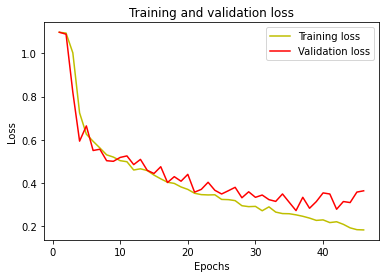

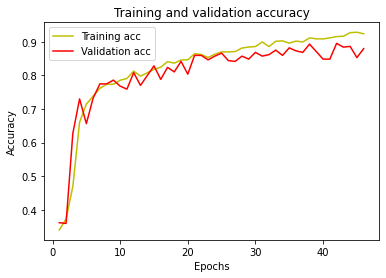

In [ ]:

#plot the training and validation accuracy and loss at each epoch   
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch. 

loss = vgg16.history['loss']
val_loss = vgg16.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = vgg16.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = vgg16.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#creating basic model and evaluating it then we will load it with weights and see if it worked
#create the model

basic_model=create_model()

filePath = '/content/drive/MyDrive/VGGModel_Predection_CSVFile/BACTERIA-2.jpeg'#load_img() function to load the image and resize it to 224 x 224 pixels.
image1 = image.load(filePath, target_size = (224, 224))
display(image1)
img_data = image.img_to_array(image1)

#evaluating the basic model with val images 
loss, acc=basic_model.evaluate(test_images,verbose=2,batch_size=8,steps=3)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
#loading weights in the model and see the results 
# Create a new model instance
model = create_model()

# Load the previously saved weights
model.load_weights(checkpoint_path)


# Re-evaluate the model
loss, acc = model.evaluate(test_images,  verbose=2,batch_size=8,steps=1)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))


In [ ]:
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

labels =[None]*len(test_images.class_indices)
labels
for x , v in test_images.class_indices.items():
  labels[v]= x

labels

my_image = img_to_array(image1)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
my_image = preprocess_input(my_image)
predict = model.predict(my_image)

pred_index =np.argmax(predict ,axis =1)
print(labels,pred_index)

# predict_vgg16 = pd.DataFrame(predict)
# predict_vgg16.to_csv('/content/drive/MyDrive/GPProject/CnnModel_Predection_CSVFile/predict_cnn.csv', index=False)

In [ ]:
test_images.class_indices

{'BAC_PNEUMONIA': 0, 'NORMAL': 1, 'VIR_PNEUMONIA': 2}

In [ ]:

import numpy
base_dir = '/content/drive/MyDrive/MixData/test/VIR_PNEUMONIA/'
Virus_counter1 = 0
Normal_counter1 = 0
BAC_counter1 = 0
cases1=0
from keras.models import load_model
saved_model3 = load_model('/content/model_saved')
for f in sorted(os.listdir(base_dir)):
  cases1 +=1
  image = tf.keras.preprocessing.image.load_img(base_dir+f , target_size=(224,224 ,3))
  input_arr = keras.preprocessing.image.img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.
  predictions = saved_model3.predict(input_arr)
  print (predictions)
  pred_in = numpy.argmax(predictions, axis=1)
  if pred_in==1: Normal_counter1 +=1
  if pred_in==0: BAC_counter1 +=1
  if pred_in==2: Virus_counter1 +=1
  print (pred_in)

print('MixData/test/VIR_PNEUMONIA file ')
print('cases total = ' + str(cases1))
print('BAC_counter = ' + str(BAC_counter1))
print('Normal_counter = ' + str(Normal_counter1))
print('Virus_counter = ' + str(Virus_counter1))

[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[1. 0. 0.]]
[0]
[[1. 0. 0.]]
[0]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[1. 0. 0.]]
[0]
[[0. 0. 1.]]
[2]
[[1. 0. 0.]]
[0]
[[0. 0. 1.]]
[2]
[[0. 1. 0.]]
[1]
[[0. 0. 1.]]
[2]
[[1. 0. 0.]]
[0]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[7.836216e-26 0.000000e+00 1.000000e+00]]
[2]
[[1. 0. 0.]]
[0]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[1. 0. 0.]]
[0]
[[1. 0. 0.]]
[0]
[[1. 0. 0.]]
[0]
[[0. 0. 1.]]
[2]
[[1. 0. 0.]]
[0]
[[4.2289404e-08 0.0000000e+00 1.0000000e+00]]
[2]
[[1. 0. 0.]]
[0]
[[1.0260687e-21 0.0000000e+00 1.0000000e+00]]
[2]
[[1. 0. 0.]]
[0]
[[1. 0. 0.]]
[0]
[[0. 0. 1.]]
[2]
[[1. 0. 0.]]
[0]
[[1.0000000e+00 0.0000000e+00 6.7167686e-20]]
[0]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[1.2970063e-06 0.0000000e+00 9.9999869e-01]]
[2]
[[0. 0. 1.]]
[2]
[[0. 0. 1.]]
[2]
[[0. 1. 0.]]
[1]
[[0. 

In [ ]:
# # """## **Visualization.**"""

# def Get_Aug_images (train_df,val_df, x_col, label_col,w=224, h= 224):
#     # train_gen = ImageDataGenerator(samplewise_center= True,
#     #                                    samplewise_std_normalization= True,
#     #                                     rescale=1/255.,
#     #                                     horizontal_flip=True,
#     #                                     vertical_flip=True,
#     #                                     rotation_range=0.4,
#     #                                     zoom_range=0.4,
#     #                                     )
#     val_gen=ImageDataGenerator(samplewise_center= True,
#                                        samplewise_std_normalization= True,
#                                         rescale=1/255.,
#                                         fill_mode='nearest',
#                                         horizontal_flip=True,
#                                         vertical_flip=True,
#                                         rotation_range=0.4,
#                                         zoom_range=0.4)
#     #flow from directory with specified batch size and target image size
#     # i=0
#     # for batch in train_gen.flow_from_dataframe(dataframe= train_df,
#     #                                               x_col= x_col,
#     #                                               y_col= label_col,
#     #                                               class_mode= 'categorical',
#     #                                               # save_to_dir ='/content/drive/MyDrive/chest_xray/Aug_images',
#     #                                               # save_format ='jpeg',
#     #                                               batch_size= 64,
#     #                                               shuffle=False,
#     #                                               target_size=(w,h)):
#     #   i+=1
#     #   if i>82:
#     #     break
    
 
#     j=0
#     for batch in val_gen.flow_from_dataframe(dataframe= val_df,
#                                                   x_col= x_col,
#                                                   y_col= label_col,
#                                                   class_mode= 'categorical',
#                                                   save_to_dir ='/content/drive/MyDrive/chest_xray/omaraugtesting',
#                                                   save_format ='jpeg',
#                                                   batch_size= 8,
#                                                   shuffle=False,
#                                                   target_size=(w,h)):
#       j+=1
#       if j>100:
#         break

    

# Get_Aug_images(train_df,val_df,'Filepath', 'Label')

# # files_path_augmented= list(glob.glob(r'/content/drive/MyDrive/chest_xray/Aug_images/*'))
# # images_aug= pd.Series(files_path_augmented, name= 'Filepath')
# # aug_df= pd.concat([images_aug], axis=1)

# # aug_df.head()

# # # Commented out IPython magic to ensure Python compatibility.
# # #visualization of some chest x-ray images from the train dataset
# # train_images_files= train_df['Filepath'].values
# # random_images= [np.random.choice(train_images_files) for i in range(9)]

# # # # %matplotlib inline
# # plt.figure(figsize=(10,5))
# # for i in range(9):
# #     plt.subplot(3,3,i+1) #no_rows , no_cols , position
# #     img= imread(random_images[i])
# #     plt.imshow(img, cmap='gray') # cmap to display the image in grayscale
# #     plt.axis("off") #to turn off the axes
# #     plt.colorbar() #adds a colorbar to a plot indicating the color scale
# # plt.tight_layout() # Adjust the padding between and around subplots.

# # # Commented out IPython magic to ensure Python compatibility.
# # #visualization of some chest x-ray aug_images from the train dataset
# # augmented_images_files= aug_df['Filepath'].values
# # random_images= [np.random.choice(augmented_images_files) for i in range(9)]

# # # %matplotlib inline
# # plt.figure(figsize=(10,5))
# # for i in range(9):
# #     plt.subplot(3,3,i+1)
# #     img= imread(random_images[i])
# #     plt.imshow(img, cmap='gray')
# #     plt.axis("off")
# #     plt.colorbar()
# # plt.tight_layout()

# # # # Display some pictures of the dataset
# # # fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(15, 7),
# # #                         subplot_kw={'xticks': [], 'yticks': []})

# # # for i, ax in enumerate(axes.flat):
# # #     ax.imshow(plt.imread(train_df.Filepath[i]))
# # #     ax.set_title(train_df.Label[i], fontsize = 15)
# # # plt.tight_layout(pad=0.5)
# # # plt.show()



# New Section